# 2022-02-04 Linear Algebra


## Last time

* Breaking Newton's method
* Exploration
* Multiple roots
* Conditioning of the rootfinding problem

## Today

* Forward and backward stability
* Beyond IEEE double precision
* Algebra of linear transformations

In [42]:
using Plots
default(linewidth=4, legendfontsize=12)

# Which is better to model inputs to a rootfinder?

* A: coefficients $a_k$ in $$p(x) = \prod_k (x - a_k)$$

* B: coefficients $b_k$ in $$p(x) = \sum_k b_k x^k$$

## Figure from Trefethen and Bau (1999)
<img alt="Ill conditioning of roots of Wilkinson's polynomial" src="../img/TB-Wilkinson.png" width="90%" />

# [Forward vs backward error and stability](https://fncbook.github.io/fnc/intro/stability.html#backward-error)

<img src="https://fncbook.github.io/fnc/_images/backwarderror.svg" width="90%" />

## Stability
**"nearly the right answer to nearly the right question"**
$$ \frac{\lvert \tilde f(x) - f(\tilde x) \rvert}{| f(\tilde x) |} \in O(\epsilon_{\text{machine}}) $$
for some $\tilde x$ that is close to $x$

## Backward Stability
**"exactly the right answer to nearly the right question"**
$$ \tilde f(x) = f(\tilde x) $$
for some $\tilde x$ that is close to $x$

* Every backward stable algorithm is stable.
* Not every stable algorithm is backward stable.

# Map angle to the unit circle

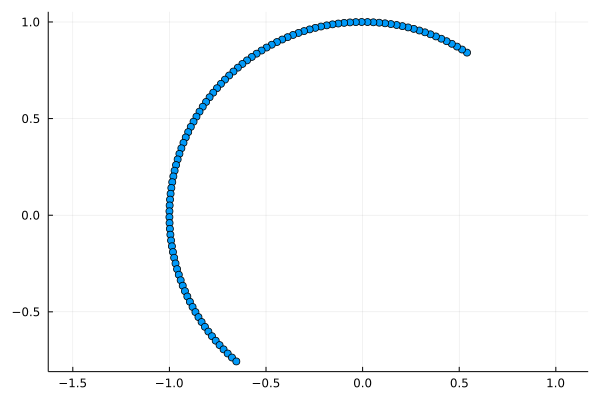

In [189]:
theta = 1 .+ LinRange(0, 3, 100)
scatter(cos.(theta), sin.(theta), legend=:none, aspect_ratio=:equal)

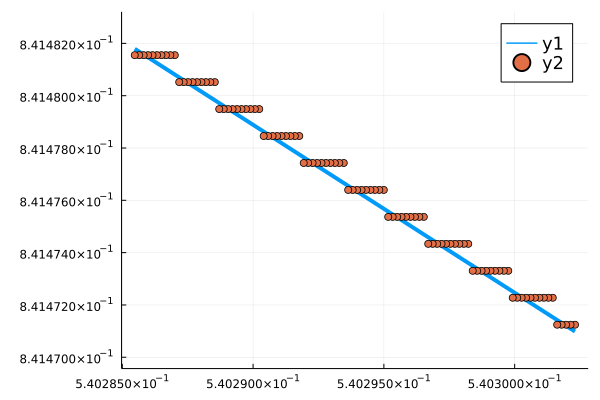

In [179]:
theta = LinRange(1., 1+2e-5, 100)
mysin(t) = cos(t - (1e10+1)*pi/2)
plot(cos.(theta), sin.(theta), aspect_ratio=:equal)
scatter!(cos.(theta), mysin.(theta))

## Are we observing A=stabiltiy, B=backward stability, or C=neither?

* The numbers $(\widetilde\cos \theta, \widetilde\sin \theta = (\operatorname{fl}(\cos \theta), \operatorname{fl}(\sin\theta))$ do not lie exactly on the unit circles.
  * There does not exist a $\tilde\theta$ such that $(\widetilde\cos \theta, \widetilde \sin\theta) = (\cos\tilde\theta, \sin\tilde\theta)$

# Accuracy of backward stable algorithms (Theorem)

A backward stable algorithm for computing $f(x)$ has relative accuracy
$$ \left\lvert \frac{\tilde f(x) - f(x)}{f(x)} \right\rvert \lesssim \kappa(f) \epsilon_{\text{machine}} . $$
Backward stability is generally the best we can hope for.

In practice, it is rarely possible for a function to be backward stable when the output space is higher dimensional than the input space.

# Beyond IEEE-754 double precision

## Lower precision IEEE-754 and relatives

The default floating point type in Python is `double` precision, which requires 8 bytes (64 bits) to store and offers $\epsilon_{\text{machine}} \approx 10^{-16}$.

* IEEE-754 **single precision** (`float` in C and related languages) is half the size (4 bytes = 32 bits) and has long been popular when adequate.
* IEEE-754 **half precision** reduces both range (exponent bits) and precision (mantissa) bits.
* **bfloat16** is a relatively new non-IEEE type that is popular in machine learning because it's easy to convert to/from single precision (just truncate/round the mantissa).


| Type | $\epsilon_{\text{machine}}$ | exponent bits | mantissa bits | diagram |
|-----|-----|---|---|---|
| double | 1.11e-16 | 11 | 52 | |
| single | 5.96e-8 | 8 | 23 | <img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Float_example.svg" width="120%" /> |
| [half](https://en.wikipedia.org/wiki/Half-precision_floating-point_format) | 4.88e-4 | 5 | 10 | <img src="https://upload.wikimedia.org/wikipedia/commons/2/21/IEEE_754r_Half_Floating_Point_Format.svg" width="100%" /> |
| [bfloat16](https://en.wikipedia.org/wiki/Bfloat16_floating-point_format) | 3.91e-3 | 8 | 7 | ![](https://upload.wikimedia.org/wikipedia/commons/0/0b/Bfloat16_format.svg) |

# Posits

<img src="../img/GustafsonPosits.png" width="90%" />

* [Gustafson and Yonemoto: **Beating Floating Point at its Own Game: Posit Arithmetic**](http://www.johngustafson.net/pdfs/BeatingFloatingPoint.pdf)
* [Interactive visualization](https://cse512-19s.github.io/FP-Well-Rounded/)
* [SoftPosit.jl](https://github.com/milankl/SoftPosit.jl) Julia package

# Mixed-precision algorithms

Sometimes reducing the precision (from double to single, or from single to half) compromises the quality of results (due to ill-conditioning or poor stability), but one can recover accurate results by using higher precision in a small fraction of the computation.  These are *mixed-precision algorithms*, and can be a useful optimization technique.

Such techniques can give up to 2x improvement if memory bandwidth (for floating point data) or pure vectorizable flops are the bottleneck.  In case of single to half precision, the benefit can be greater than 2x when using special hardware, such as GPUs with "tensor cores".

Warning: Premature use of mixed-precision techniques can often obscure better algorithms that can provide greater speedups and/or reliability improvements.

# Matrices as linear transformations

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,1} \Bigg| A_{:,2} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_1 \\ x_2 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,1} \Bigg] x_1 + \Bigg[ A_{:,2} \Bigg] x_2 + \dotsb . $$

# Math and Julia Notation

The notation $A_{i,j}$ corresponds to the Julia syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column and $A_{i,:}$ is the $i$th row.  The corresponding Julia syntax is `A[:,j]` and `A[i,:]`.

Julia has syntax for row vectors, column vectors, and arrays.

In [1]:
[1. 2 3]

1×3 Matrix{Float64}:
 1.0  2.0  3.0

In [2]:
[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [3]:
[1 0; 0 2; 10 3]

3×2 Matrix{Int64}:
  1  0
  0  2
 10  3

In [5]:
[1; 2; 3]' # transpose

1×3 adjoint(::Vector{Int64}) with eltype Int64:
 1  2  3

# Implementing multiplication by row

In [16]:
function matmult1(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        for j in 1:n
            y[i] += A[i,j] * x[j]
        end
    end
    y
end

A = reshape(1.:12, 3, 4) # 3x4 matrix
x = [10., 0, 0, 0]
matmult1(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

In [15]:
# Dot product
A[2,:]' * x

20.0

In [17]:
function matmult2(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        y[i] = A[i,:]' * x
    end
    y
end

matmult2(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

# Implementing multiplication by column


In [19]:
function matmult3(A, x)
    m, n = size(A)
    y = zeros(m)
    for j in 1:n
        y += A[:, j] * x[j]
    end
    y
end

matmult3(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

In [21]:
A * x # We'll use this version

3-element Vector{Float64}:
 10.0
 20.0
 30.0

# Polynomial evaluation is (continuous) linear algebra
We can evaluate polynomials using matrix-vector multiplication.
For example,
$$ 5x^3 - 3x = \Bigg[ 1 \Bigg|\, x \Bigg|\, x^2 \,\Bigg|\, x^3 \Bigg] \begin{bmatrix}0 \\ -3 \\ 0 \\ 5 \end{bmatrix} . $$

In [57]:
using Polynomials
P(x) = Polynomial(x)

p = [0, -3, 0, 5]
q = [1, 2, 3, 4]
f = P(p) + P(q)
@show f
@show P(p+q)
x = [0., 1, 2]
f.(x)

f = Polynomial(1 - x + 3*x^2 + 9*x^3)
P(p + q) = Polynomial(1 - x + 3*x^2 + 9*x^3)


3-element Vector{Float64}:
  1.0
 12.0
 83.0

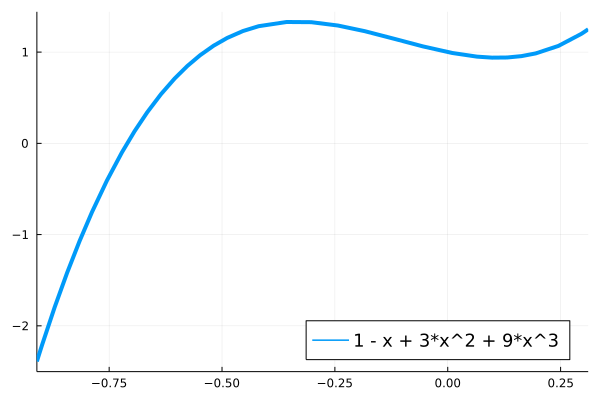

In [54]:
plot(f, legend=:bottomright)

# Polynomial evaluation is (discrete) linear algebra

In [63]:
V = [one.(x) x x.^2 x.^3]

3×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0
 1.0  2.0  4.0  8.0

In [61]:
V * p + V * q

3-element Vector{Float64}:
  1.0
 12.0
 83.0

In [62]:
V * (p + q)

3-element Vector{Float64}:
  1.0
 12.0
 83.0

# Vandermonde matrices

A Vandermonde matrix is one whose columns are functions evaluated at discrete points.

$$V(x) = \begin{bmatrix} 1 \Bigg| x \Bigg| x^2 \Bigg| x^3 \Bigg| \dotsb \end{bmatrix}$$

In [40]:
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

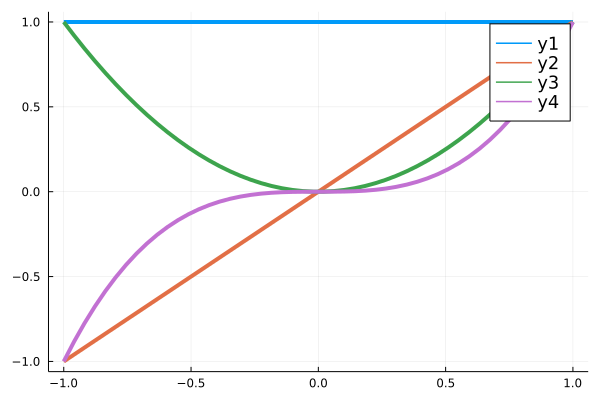

In [67]:
x = LinRange(-1, 1, 50)
V = vander(x, 4)
plot(x, V)

# Fitting is linear algebra

$$ \underbrace{\begin{bmatrix} 1 \Bigg| x \Bigg| x^2 \Bigg| x^3 \Bigg| \dotsb \end{bmatrix}}_{V(x)} \Big[ p \Big] = \Bigg[ y \Bigg]$$

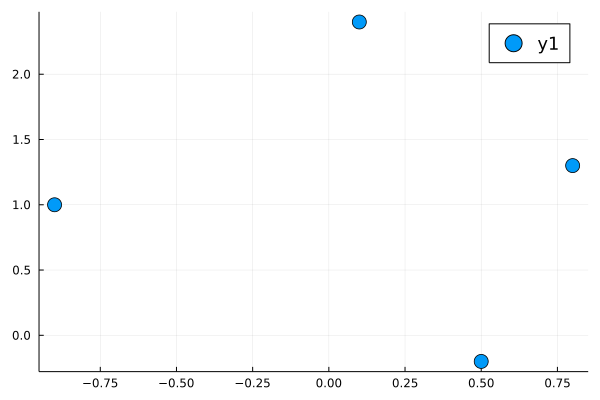

In [77]:
x1 = [-.9, 0.1, .5, .8]
y1 = [1, 2.4, -.2, 1.3]
scatter(x1, y1, markersize=8)

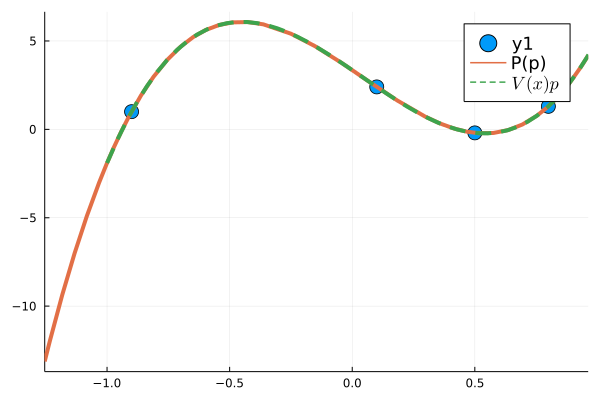

In [78]:
V = vander(x1)
p = V \ y1 # write y1 in the polynomial basis
scatter(x1, y1, markersize=8)
plot!(P(p), label="P(p)")
plot!(x, vander(x, 4) * p, label="\$ V(x) p\$", linestyle=:dash)

# Some common terminology

* The **range** of $A$ is the space spanned by its columns.  This definition coincides with the range of a function $f(x)$ when $f(x) = A x$.
* The (right) **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.
* The **rank** of $A$ is the dimension of its range.
* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the 0 vector).  Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.
* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank.  We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

$\DeclareMathOperator{\rank}{rank} \DeclareMathOperator{\null}{null} $
If $A \in \mathbb{R}^{m\times m}$, which of these doesn't belong?
1. $A$ has an inverse $A^{-1}$
2. $\rank (A) = m$
3. $\null(A) = \{0\}$
4. $A A^T = A^T A$
5. $\det(A) \ne 0$
6. $A x = 0$ implies that $x = 0$

In [37]:
A = rand(4,4)
A' * A - A * A'

4×4 Matrix{Float64}:
  0.0159134   0.0983944   0.0618018  -0.024729
  0.0983944   0.221567   -0.104667    0.219141
  0.0618018  -0.104667   -0.347429   -0.101233
 -0.024729    0.219141   -0.101233    0.109949

# What is an inverse?

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though [it's not as "bad"](https://arxiv.org/abs/1201.6035) as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity.
Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:,i} x_i$.


In [38]:
using LinearAlgebra
A = rand(4, 4)

4×4 Matrix{Float64}:
 0.171487   0.234287  0.631658  0.826556
 0.0358488  0.205777  0.179601  0.798986
 0.65429    0.636279  0.60436   0.843043
 0.298519   0.384719  0.210138  0.624711

In [73]:
A \ A

4×4 Matrix{Float64}:
  1.0   0.0   1.17602e-17  -2.34622e-15
  0.0   1.0   1.62394e-16   2.90426e-15
  0.0   0.0   1.0           4.00911e-16
 -0.0  -0.0  -0.0           1.0

In [74]:
inv(A) * A

4×4 Matrix{Float64}:
  1.0          -1.17283e-15  -2.78331e-15  -1.33991e-15
 -1.49149e-15   1.0           1.05979e-15   3.05501e-15
  3.84823e-16   5.99243e-16   1.0          -1.777e-16
  3.92402e-16   4.65401e-17  -3.71916e-17   1.0